## 1. Generating MNIST data with Generative adversarial network (GAN)

In [9]:
import sys
import torch
import os

current_directory = os.getcwd()
print("Current working directory:", current_directory)

sys.path.append("./gan")
from WGAN_GP import WGANGP

Current working directory: c:\Users\Kok-WeiBong\Documents\MEGA\projects\pytorch-projects


## 2. Defining the hyperparameters and loading the data

In [10]:
# Configuration
# input_dim = 100
# output_dim = 784  # Assuming MNIST
# hidden_dim = 256
# batch_size = 64
# lr = 0.0002
# num_epochs = 50
# lambda_gp = 10
# save_interval = 10
# model_path = "./gan/model_weights/"

gan = WGANGP(
    input_dim=100,
    output_dim=784,
    hidden_dim=128,
    lr=0.0005,
    batch_size=64,
    num_epochs=500,
    lambda_gp=10,
    save_interval=10,
    save_path="./gan/models/",
)

## 3. Load or train the model

In [11]:
# User options
option = "load"
gen_path = "./gan/models/generator_final.pth"

if option == "train":
    # Initialize models
    gan.train()
elif option == "load":
    gan.load_models(gen_path)
    print("Model loaded successfully.")
else:
    print("Invalid option")

Model loaded successfully.


## 4. Generating MNIST

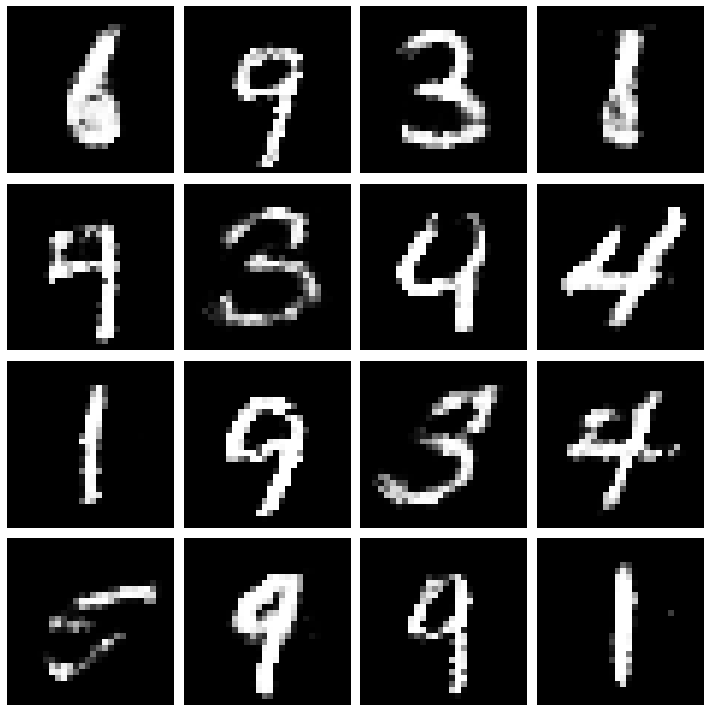

In [24]:
import matplotlib.pyplot as plt
import numpy as np


# Function to generate new data
def generate_images(generator, num_images, input_dim):
    # Generate random latent vectors
    z = torch.randn(num_images, input_dim)

    # Generate images from the latent vectors
    with torch.no_grad():  # No need to track gradients
        fake_images = (
            generator(z).cpu().view(-1, 28, 28)
        )  # Reshape images to 28x28 (MNIST size)

    return fake_images


# Generate some images
num_samples = 16  # Number of images to generate
input_dim = (
    100  # The dimension of the input noise vector, ensure it matches your model's input
)
fake_images = generate_images(gan.G.eval(), num_samples, input_dim)

# Plot the generated images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(fake_images[i], cmap="gray", interpolation="none")
    ax.axis("off")
plt.tight_layout()
plt.savefig("./figures/generated_output_003.png")
plt.show()